In [ ]:
import numpy as np
#import seaborn as sn #another library used for statistical data visualization                           

In [3]:
import pandas as pd

# Read the CSV file into a DataFrame
data = pd.read_csv('./scattering_data.csv')

# Display the first few rows of the DataFrame
print("Original Data:")
print(data.head())

# Separate the source coordinates and the event features
sources = data[['source_x', 'source_y', 'source_z']]
events = data.drop(columns=['source_x', 'source_y', 'source_z'])

# Display the separate DataFrames
print("\nSource Data:")
print(sources.head())

print("\nEvent Data:")
print(events.head())
combined_data = pd.concat([sources, events], axis=1)

# Ensure the DataFrame is sorted by the source if needed
combined_data = combined_data.sort_values(by=['source_x', 'source_y', 'source_z'])

# Split the combined DataFrame into X (features) and y (targets)
X = combined_data.drop(columns=['source_x', 'source_y', 'source_z'])
y = combined_data[['source_x', 'source_y', 'source_z']]

# Convert DataFrame to numpy arrays for machine learning
X = X.to_numpy()
y = y.to_numpy()

# Display the shapes of the feature and target arrays
print(f"\nX shape: {X.shape}")
print(f"y shape: {y.shape}")

Original Data:
    source_x  source_y  source_z   absorb_x   absorb_y    absorb_z     scat_x  \
0  34.320096  6.202406       0.0  36.923629  41.264287 -308.684038  36.923629   
1  34.320096  6.202406       0.0  15.813507  33.236623 -308.971315  15.813507   
2  34.320096  6.202406       0.0  34.735896  22.080518 -308.363078  34.735896   
3  34.320096  6.202406       0.0  32.274928  39.064688 -290.526457  32.274928   
4  34.320096  6.202406       0.0  31.449623  31.730069 -290.103437  31.449623   

      scat_y  scat_z     theta       e_energy  
0  31.417577  -200.0  0.175318  901587.681758  
1  39.980064  -200.0  2.310872  999372.042479  
2  12.975734  -200.0  0.426357  981877.866271  
3  29.410122  -200.0  0.263606  953941.667034  
4  21.922255  -200.0  0.196369  919957.998125  

Source Data:
    source_x  source_y  source_z
0  34.320096  6.202406       0.0
1  34.320096  6.202406       0.0
2  34.320096  6.202406       0.0
3  34.320096  6.202406       0.0
4  34.320096  6.202406       0.

In [4]:
from sklearn.model_selection import train_test_split

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shapes
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (40000, 8)
y_train shape: (40000, 3)
X_test shape: (10000, 8)
y_test shape: (10000, 3)


In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Use MultiOutputRegressor to handle multi-output regression


In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor


# Use MultiOutputRegressor to handle multi-output regression
multi_rf = MultiOutputRegressor(GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2))

# Train the model
multi_rf.fit(X_train, y_train)


Fitting 3 folds for each of 648 candidates, totalling 1944 fits


C:\Users\fazee\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning:


648 fits failed out of a total of 1944.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
292 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\fazee\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\fazee\anaconda3\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\fazee\anaconda3\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\fazee\anaconda3\lib\site-pack

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


C:\Users\fazee\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning:


648 fits failed out of a total of 1944.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
520 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\fazee\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\fazee\anaconda3\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\fazee\anaconda3\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\fazee\anaconda3\lib\site-pack

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


C:\Users\fazee\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning:


648 fits failed out of a total of 1944.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
433 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\fazee\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\fazee\anaconda3\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\fazee\anaconda3\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\fazee\anaconda3\lib\site-pack

MultiOutputRegressor(estimator=GridSearchCV(cv=3,
                                            estimator=RandomForestRegressor(random_state=42),
                                            n_jobs=-1,
                                            param_grid={'bootstrap': [True,
                                                                      False],
                                                        'max_depth': [None, 10,
                                                                      20, 30],
                                                        'max_features': ['auto',
                                                                         'sqrt',
                                                                         'log2'],
                                                        'min_samples_leaf': [1,
                                                                             2,
                                                                             4],
                                                        'min_samples_split': [2,
                                                                              5,
                                                                              10],
                                                        'n_estimators': [100,
                                                                         200,
                                                                         300]},
                                            verbose=2))

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
# Predict on the test set
y_pred = multi_rf.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 6.666291224576959
Mean Squared Error (MSE): 88.99603321476532
Root Mean Squared Error (RMSE): 9.43377089051697
R-squared (R²): 0.3326046533509565


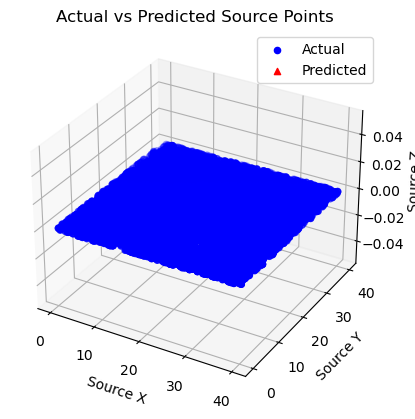

In [12]:
# Plotting actual vs. predicted source points
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Actual source points
ax.scatter(y_test[:, 0], y_test[:, 1], y_test[:, 2], c='blue', marker='o', label='Actual')

# Predicted source points
ax.scatter(y_pred[:, 0], y_pred[:, 1], y_pred[:, 2], c='red', marker='^', label='Predicted')

ax.set_xlabel('Source X')
ax.set_ylabel('Source Y')
ax.set_zlabel('Source Z')
ax.set_title('Actual vs Predicted Source Points')
ax.legend()

plt.show()

In [13]:
import plotly.graph_objects as go

# Assuming y_test and y_pred are already defined as numpy arrays from the previous steps

# Create a 3D scatter plot for actual source points
actual_scatter = go.Scatter3d(
    x=y_test[:, 0],
    y=y_test[:, 1],
    z=y_test[:, 2],
    mode='markers',
    marker=dict(size=4, color='blue'),
    name='Actual'
)

# Create a 3D scatter plot for predicted source points
predicted_scatter = go.Scatter3d(
    x=y_pred[:, 0],
    y=y_pred[:, 1],
    z=y_pred[:, 2],
    mode='markers',
    marker=dict(size=4, color='red'),
    name='Predicted'
)

# Define the layout
layout = go.Layout(
    title='Actual vs Predicted Source Points',
    scene=dict(
        xaxis_title='Source X',
        yaxis_title='Source Y',
        zaxis_title='Source Z'
    ),
    legend=dict(x=0, y=1)
)

# Create the figure
fig = go.Figure(data=[actual_scatter, predicted_scatter], layout=layout)

# Show the figure
fig.show()
